     Y  X1  X2  X3  X4  X5  X6
0    0   3   3   3   4   2   4
1    0   3   2   3   5   4   3
2    1   5   3   3   3   3   5
3    0   5   4   3   3   3   5
4    0   5   4   3   3   3   5
..  ..  ..  ..  ..  ..  ..  ..
121  1   5   2   3   4   4   3
122  1   5   2   3   4   2   5
123  1   5   3   3   4   4   5
124  0   4   3   3   4   4   5
125  0   5   3   2   5   5   5

[126 rows x 7 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Y       126 non-null    int64
 1   X1      126 non-null    int64
 2   X2      126 non-null    int64
 3   X3      126 non-null    int64
 4   X4      126 non-null    int64
 5   X5      126 non-null    int64
 6   X6      126 non-null    int64
dtypes: int64(7)
memory usage: 7.0 KB
16
     Y  X1  X2  X3  X4  X5  X6
0    0   3   3   3   4   2   4
1    0   3   2   3   5   4   3
2    1   5   3   3   3   3   5
3    0   5   4   3  

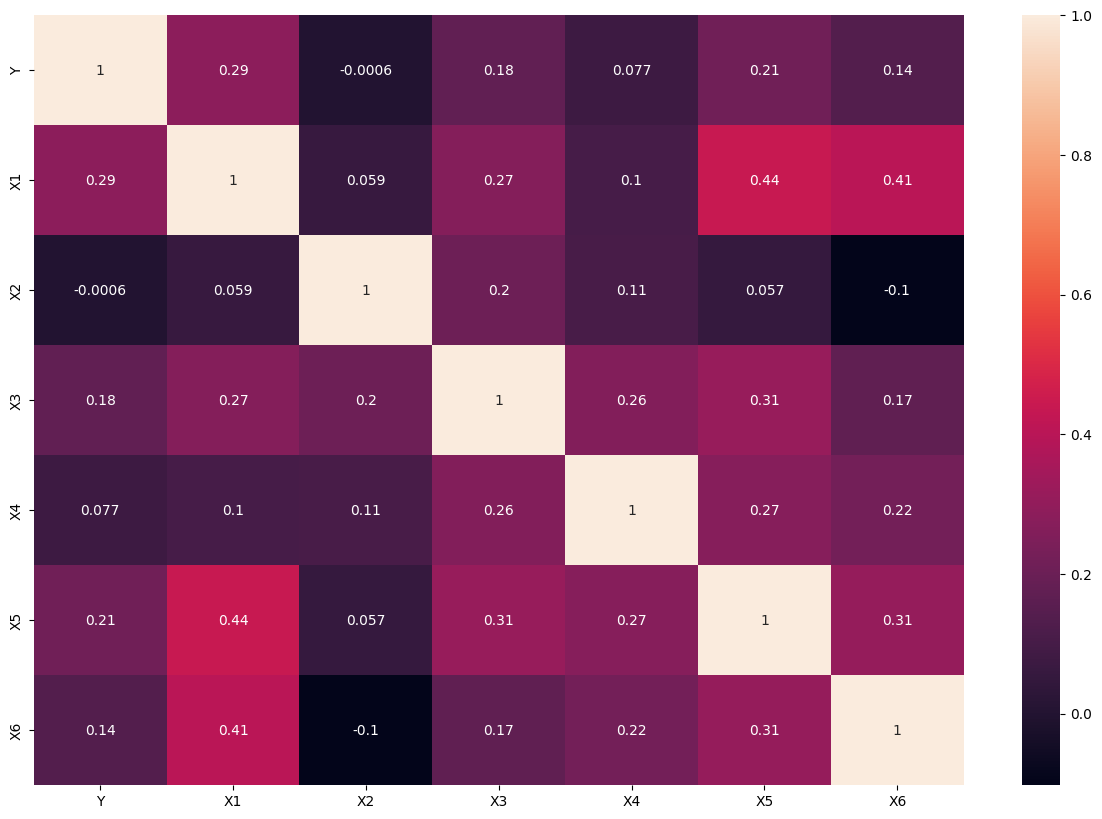

In [3]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
# from lightgbm import LGBMClassifier

df = pd.read_csv('ACME-HappinessSurvey2020.csv')
print(df)
df.info()

print(len(df)-len(df.drop_duplicates())) #finding duplicates to remove, because duplicates leads to overfitting

df = df.drop_duplicates()
df.reset_index(drop=True, inplace=True)
print(df)

fig, ax = plt.subplots(figsize=(15,10))
corr = df.corr()
sns.heatmap(corr, annot=True)


y = df['Y']
X = df.drop(['Y'], axis=1)

# Split into test and train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

features = ['X1', 'X2', 'X3', 'X4', 'X5', 'X6']
target = ['Y']

knn = KNeighborsClassifier()
rf = RandomForestClassifier()
dt = DecisionTreeClassifier()
# lgbm = LGBMClassifier()

models = [knn, rf, dt]


def test_models(l):
    for model in models:
        model.fit(X_train, y_train)
        y_predict = model.predict(X_test)
        acc = accuracy_score(y_test, y_predict)
        print(model)
        print("\nThe Training Accuracy is : {} \n".format(model.score(X_train, y_train) * 100))
        print('The Test Accuracy is : {}\n\n'.format(acc))


test_models(models)